<a href="https://colab.research.google.com/github/Sofigam00s/Aprendizaje-Automatico-2-IA/blob/main/Gamallo_TP1_AA2_mnist_consigna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo pr√°ctico nro 1 de AA2.

**Sof√≠a Antonia Gamallo**

**DNI:42432866**


Resolver las consignas comentando el c√≥digo fuente, indicando desde d√≥nde fue extraido o generado.

Justificar cada paso realizado.

Publique enlace p√∫blico a su notebook en google colab y tambi√©n enlace a su repositorio github de la materia.








# Carga de librer√≠as

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from torchvision import datasets, transforms


## 1- Usar pytorch para crear una clase que herede de dataset para crear un dataset propio.

El dataset est√° basado en el original de MNIST. En este dataset s√≥lo se guardan dos de las 10 clases del dataset original


In [ ]:
# prompt: usar pytorch para crear una clase que herede de dataset para crear un dataset propio. El dataset est√° basado en el original de MNIST. En este dataset s√≥lo se guardan dos de las 10 clases del dataset original

import torch
from torch.utils.data import Dataset
from torchvision import datasets, transforms

class MNISTSubset(Dataset):
    def __init__(self, root='./data', train=True, download=True, transform=None, target_classes=[0, 1]):
        self.mnist_dataset = datasets.MNIST(root=root, train=train, download=download, transform=transform)
        self.target_classes = target_classes
        self.indices = [i for i, target in enumerate(self.mnist_dataset.targets) if target in self.target_classes]
        self.targets = [self.mnist_dataset.targets[i] for i in self.indices]

        # Remap targets to 0 and 1
        self.targets = [self.target_classes.index(target) for target in self.targets]
        self.targets = torch.tensor(self.targets)


    def __len__(self):
        return len(self.indices)

    def __getitem__(self, idx):
        image, _ = self.mnist_dataset[self.indices[idx]] # Get image from original MNIST dataset
        target = self.targets[idx] # Get corresponding remapped target

        return image, target





En el siguiente ejemplo, se eligen las clases 3 y 8.
La idea es elegir n√∫meros que sean algo similares para evaluar c√≥mo nuestras distintas configuraciones de ANN se comportan a distinguir ambas clases.

Puede elegir por ejemplo:

* 3 y 8
* 7  y 4
* 0 y 8
* 6 y 8
* 2 y 4
* 5 y 6

### Elija pronto cu√°les clases quiere distinguir y postee en el foro.



> Voy a utilizar las clases **5 y 6**



In [ ]:

transform = transforms.Compose([transforms.ToTensor()])
mnist_subset = MNISTSubset(train=True, transform=transform, target_classes=[5, 6])


## 2- Usar el dataset anterior para crear una red neuronal profunda en Pytorch para aprender un clasificador binario.

Debe contemplar tres tipos de configuraciones:

* 2.1 Una donde se muestre subajuste (underfitting).
* 2.2 Una donde considere que su funcionamiento es aceptable
* 2.3 Una donde demuestre un comportamiento de overfitting o sobreajuste.

Puede utilizar s√≥lo nn.Linear y funciones de activaci√≥n. Es s√≥lo las redes neuronales que ya aprendieron con varias capas / unidades ocultas y funciones de activaci√≥n.




## Desarrollo

Para empezar a realizar las consignas, me voy a basar en el trabajo n¬∞4 de **Aprendizaje Autom√°tico 1** donde vimos las redes neuronales con *scikit-learn* y trabajamos los diferentes resultados que puede obtener una red neuronal.

### 2.1 Red que subajusta

Teniendo en cuenta que una red que subajuste significa que ''no puede aprender correctamente'' de los datos, voy a crearla con una sola capa lineal y sin ninguna neurona, ni tampoco funciones de activacion o regulaci√≥n, para que su rendimiento sea bastante malo.

In [ ]:
class Modelo_NN_subajusta(nn.Module):
    def __init__(self):
        super(Modelo_NN_subajusta, self).__init__()
        self.flatten = nn.Flatten()
        self.layer_1 = nn.Linear(784, 1)
        self.sigmoid = nn.Sigmoid() # Add sigmoid activation

    def forward(self, x):
        x = self.flatten(x)
        x = self.layer_1(x)
        x = self.sigmoid(x) # Apply sigmoid
        return x


>El motivo por el cual hice una red tan simple es para poder tener una comparaci√≥n clara en los resultados de subajuste, sobreajuste y uno √≥ptimo.



### 2.2 Red que sobre ajusta

Para esta red voy a hacer lo contrario a la de subajuste, quiero que aprenda los datos al punto de memorizarlos, as√≠ va a generar un rendimiento muy alto en su entrenamiento pero a la hora de que tenga datos nuevos (de testeo) no va a poder generalizarlos muy bien, dando como resultado una gran diferencia entre la exactitud de entrenamiento y la de testeo.

Entonces esta red va a tener muchas capas y muchas neuronas, sin ninguna regulaci√≥n, para que memorice los datos y aprenda incluso el ruido de ellos.



In [ ]:
class Modelo_NN_SobreAjustado(nn.Module):
    def __init__(self):
        super(Modelo_NN_SobreAjustado, self).__init__()
        self.flatten = nn.Flatten()
        self.layer_1 = nn.Linear(784, 400)
        self.layer_2 = nn.Linear(400, 200) # Corrected input size
        self.layer_3 = nn.Linear(200, 100)
        self.layer_4 = nn.Linear(100, 50) # Corrected input size
        self.output = nn.Linear(50, 1) # Corrected input size


    def forward(self, x):
        x = self.flatten(x)
        x = torch.relu(self.layer_1(x))
        x = torch.relu(self.layer_2(x))
        x = torch.relu(self.layer_3(x))
        x = torch.relu(self.layer_4(x))
        x = torch.sigmoid(self.output(x))
        return x


> Como se puede ver, esta red tiene muchas capas y muchas neuronas (4 capas ocultas que comienza con 400 neuronas y van disminuyendo hasta la √∫ltima capa, que devuelve una sola salida). Adem√°s la funci√≥n de activaci√≥n ReLU ayuda a que la red aprenda patrones muy espec√≠ficos y todo en conjunto deber√≠a dar como resultado un sobreajuste.




### 2.3 MLP aceptable

Al realizar las redes anteriores, busqu√© par√°metros extremos para crear un subajuste y un sobreajuste a prop√≥sito.

Ahora para encontrar un resultado m√°s aceptable, voy a buscar un balance en los par√°metros y ayudarme de funciones de regulaci√≥n que le permitan a la red tener un rendimiento m√°s √≥ptimo.

Para ello voy a empezar con 2 capas ocultas y menos cantidad de neuronas. Tambi√©n le voy a agregar las funciones ReLU y sigmoid que son las m√°s conocidas para mejorar la efiencia de la red. Por √∫ltimo, Copilot me recomend√≥ la funci√≥n de regulaci√≥n Dropout que ayuda a reducir el sobreajuste y me parece ideal para buscar un buen resultado.

In [ ]:
class Modelo_NN_aceptable(nn.Module):
    def __init__(self):
        super(Modelo_NN_aceptable, self).__init__()
        self.flatten = nn.Flatten()
        self.layer_1 = nn.Linear(784, 196)
        self.layer_2 = nn.Linear(196, 98)
        self.output = nn.Linear(98, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = self.flatten(x)
        x = self.relu(self.layer_1(x))
        x = self.dropout(x)
        x = self.relu(self.layer_2(x))
        x = self.dropout(x)
        x = self.sigmoid(self.output(x)) # Apply sigmoid
        return x



> Si bien estoy probando los par√°metros todav√≠a 'a ciegas' espero que con esta confguraci√≥n el rendimiento mejore a comparaci√≥n de las redes anteriores.




## 3 - Entrene las redes anteriores, muestre los resultados durante su entrenamiento, validaci√≥n. Indique las m√©tricas utilizadas. Justifique.

A este punto del trabajo, me estoy ayudando de este tutorial que esta hecho en espa√±ol:

https://phuijse.github.io/MachineLearningBook/contents/neural_networks/torch-training.html

Y tambi√©n con ayuda de Copilot, para adaptar el tutorial a lo que necesito.

### 3.1 Cargue los datos, divida los conjuntos de datos

En este caso, me estoy guiando con la parte 13.4 **Entrenamiento por minibaches** donde primero carga los datos y los divide en train y test, pero tambi√©n usa una porci√≥n de los datos para la *validaci√≥n*, que se usa para monitorear el rendimiento durante el entrenamiento y tambi√©n poder aplicar t√©cinas como el early stopping.

As√≠ que primero quiero saber la cantidad de ejemplos del dataset creado al principio (con las clases 5 y 6 en mi caso) para entender un poco mejor la divisi√≥n de los datos.

In [ ]:
print("Cantidad de ejemplos en el dataset:", len(mnist_subset))


Cantidad de ejemplos en el dataset: 11339


>Le ped√≠ a Copilot que me cargue los datos y los divida teniendo en cuenta esta cantidad de ejemplo:





In [ ]:
#C√≥digo proporcionado por Copilot

from torch.utils.data import random_split, DataLoader

# Divisi√≥n en proporciones: 80% entrenamiento, 10% validaci√≥n, 10% testeo
train_size = int(0.8 * 11339)   # ‚âà 9071
valid_size = int(0.1 * 11339)   # ‚âà 1133
test_size = 11339 - train_size - valid_size  # ‚âà 1135

train_set, valid_set, test_set = random_split(
    mnist_subset,
    [train_size, valid_size, test_size],
    generator=torch.Generator().manual_seed(1234)  # reproducibilidad
)

# DataLoaders
train_loader = DataLoader(train_set, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_set, batch_size=128, shuffle=False)
test_loader = DataLoader(test_set, batch_size=128, shuffle=False)


### 3.2 Entrene cada modelo.

Para este punto voy a utilizar una parte del siguiente tutorial:

https://www.datacamp.com/es/tutorial/pytorch-tutorial-building-a-simple-neural-network-from-scratch

Me gust√≥ este tutorial porque en la parte de entrenar el modelo elige la funci√≥n de entrop√≠a cruzada binaria que es ideal para la clasificaci√≥n de las clases 5 y 6.




> Como son tres modelos los que hay que entrenar, los voy a agrupar en un diccionario para poder usarlos en un buclue que recorra cada modelo y luego pase al bucle de las √©pocas:



In [ ]:
modelos = {
    "subajusta": Modelo_NN_subajusta(),
    "sobreajusta": Modelo_NN_SobreAjustado(),
    "aceptable": Modelo_NN_aceptable()
}



> Usando el mismo c√≥digo de la p√°gina de datacamp, le ped√≠ ayuda a Copilot para adaptarlo a mi trabajo y usar el diccionario para crear el primer bucle:



In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_epochs = 100
resultados = {}

for nombre, modelo in modelos.items():
    print(f"\nEntrenando el modelo: {nombre}")
    modelo.to(device)

    loss_fn = nn.BCELoss()
    optimizer = optim.SGD(modelo.parameters(), lr=0.01)
    train_loss_values = []
    valid_loss_values = []

    for epoch in range(num_epochs):
        # Entrenamiento
        modelo.train()
        epoch_train_loss = 0
        for X, y in train_loader:
            X, y = X.to(device), y.to(device).float().unsqueeze(-1)
            optimizer.zero_grad()
            pred = modelo(X)
            loss = loss_fn(pred, y)
            loss.backward()
            optimizer.step()
            epoch_train_loss += loss.item() * X.size(0)
        train_loss_values.append(epoch_train_loss / len(train_set))

        # Validaci√≥n
        modelo.eval()
        epoch_valid_loss = 0
        with torch.no_grad():
            for X_valid, y_valid in valid_loader:
                X_valid, y_valid = X_valid.to(device), y_valid.to(device).float().unsqueeze(-1)
                pred_valid = modelo(X_valid)
                loss_valid = loss_fn(pred_valid, y_valid)
                epoch_valid_loss += loss_valid.item() * X_valid.size(0)
        valid_loss_values.append(epoch_valid_loss / len(valid_set))

        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss_values[-1]:.4f}, Valid Loss: {valid_loss_values[-1]:.4f}')


    resultados[nombre] = {"train_loss": train_loss_values, "valid_loss": valid_loss_values}
    print(f"Entrenamiento listo para: {nombre}")


Entrenando el modelo: subajusta
Epoch [10/100], Train Loss: 0.0863, Valid Loss: 0.0846
Epoch [20/100], Train Loss: 0.0742, Valid Loss: 0.0740
Epoch [30/100], Train Loss: 0.0686, Valid Loss: 0.0689
Epoch [40/100], Train Loss: 0.0649, Valid Loss: 0.0650
Epoch [50/100], Train Loss: 0.0621, Valid Loss: 0.0629
Epoch [60/100], Train Loss: 0.0599, Valid Loss: 0.0608
Epoch [70/100], Train Loss: 0.0581, Valid Loss: 0.0597
Epoch [80/100], Train Loss: 0.0565, Valid Loss: 0.0586
Epoch [90/100], Train Loss: 0.0551, Valid Loss: 0.0575
Epoch [100/100], Train Loss: 0.0538, Valid Loss: 0.0565
Entrenamiento listo para: subajusta

Entrenando el modelo: sobreajusta
Epoch [10/100], Train Loss: 0.0509, Valid Loss: 0.0543
Epoch [20/100], Train Loss: 0.0238, Valid Loss: 0.0323
Epoch [30/100], Train Loss: 0.0099, Valid Loss: 0.0232
Epoch [40/100], Train Loss: 0.0031, Valid Loss: 0.0246
Epoch [50/100], Train Loss: 0.0013, Valid Loss: 0.0175
Epoch [60/100], Train Loss: 0.0007, Valid Loss: 0.0195
Epoch [70/100],

### 3.3 Muestre y compare los resultados de cada modelo entre conjuntos de entrenamiento y testeo.

Muestre y compare los resultados de cada modelo entre conjuntos de entrenamiento y testeo. Escriba sus conclusiones y pasos realizados.



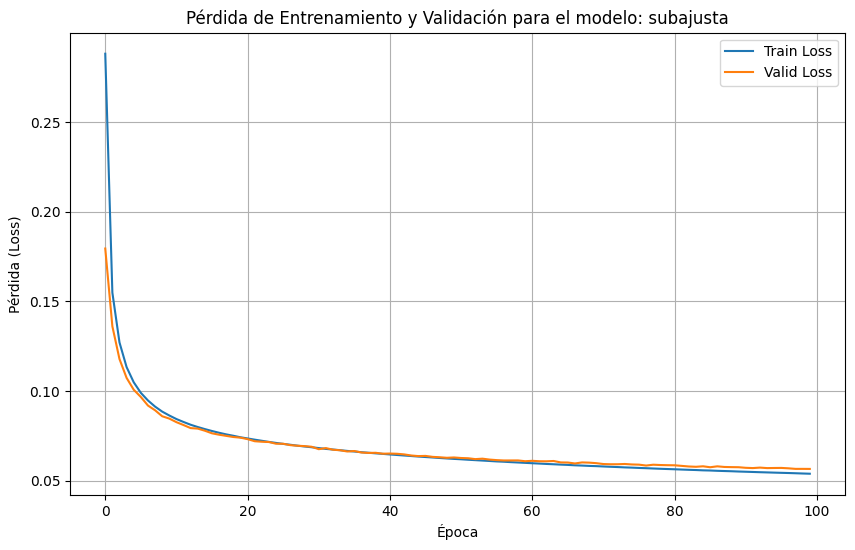

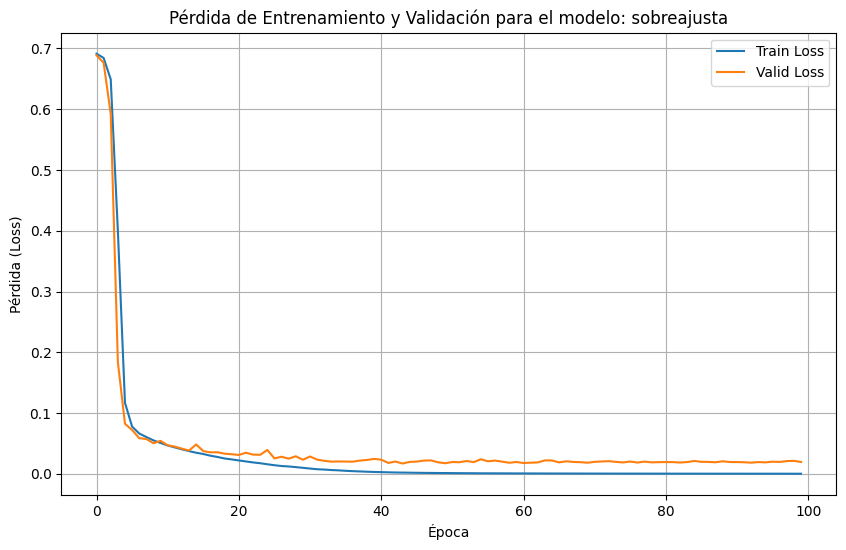

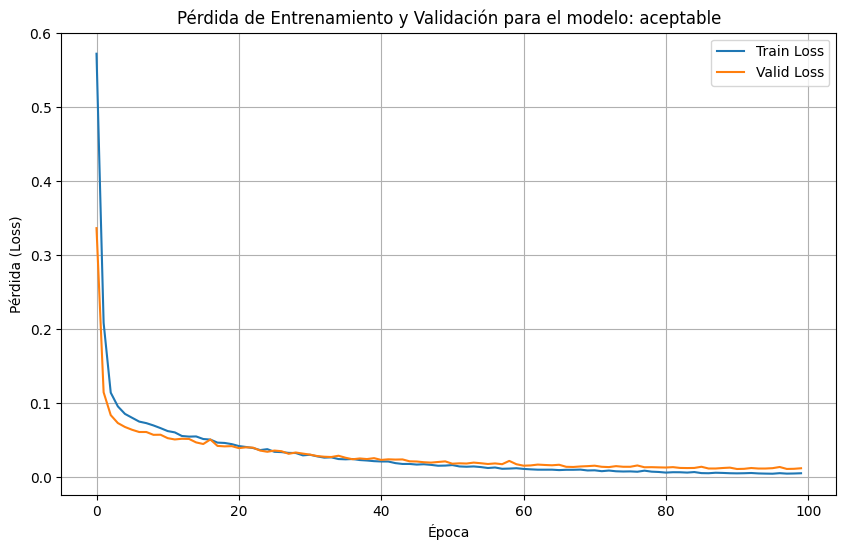

In [ ]:
# prompt: Generar un gr√°fico de p√©rdida y √©pocas en train y test para cada modelo
import matplotlib.pyplot as plt

for nombre, data in resultados.items():
    plt.figure(figsize=(10, 6))
    plt.plot(data["train_loss"], label="Train Loss")
    plt.plot(data["valid_loss"], label="Valid Loss")
    plt.title(f"P√©rdida de Entrenamiento y Validaci√≥n para el modelo: {nombre}")
    plt.xlabel("√âpoca")
    plt.ylabel("P√©rdida (Loss)")
    plt.legend()
    plt.grid(True)
    plt.show()



*   **Gr√°fico de subajuste:** la p√©rdida baja m√°s lento a comparaci√≥n de los otros modelos, y tambi√©n tiene un mayor valor de p√©rdida al final.
*   **Gr√°fico de sobreajuste:** la p√©rdida baja mas r√°pido y llega al punto de casi el 0% en el entrenamiento. Sin embargo, la curva de testeo no baja tanto y genera el sobreajuste.
*   **Gr√°fico aceptable:** Las curvas son muy similares al gr√°fico de sobreajuste, y en este caso la p√©rdida tambi√©n disminuye casi al 0%, pero las curvas no se separan por lo tanto no se genera un sobreajuste.


Los tres modelos a simple vista son muy similares ya que los valores de p√©rdida y el comportamiento de las curvas no diferen mucho unas de otras. Sin embargo s√≠ se puede decir que las redes echas intencionamelte para generar rendimientos con subajuste, sobreajuste y aceptable cumplieron su objetivo, aunque no de manera exagerada.




Evaluando el modelo: subajusta


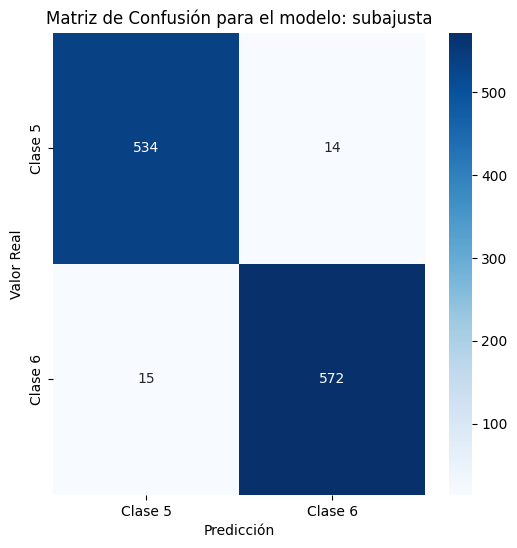


Evaluando el modelo: sobreajusta


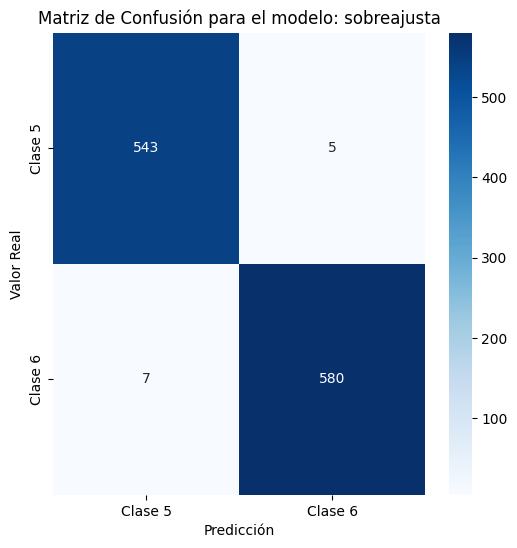


Evaluando el modelo: aceptable


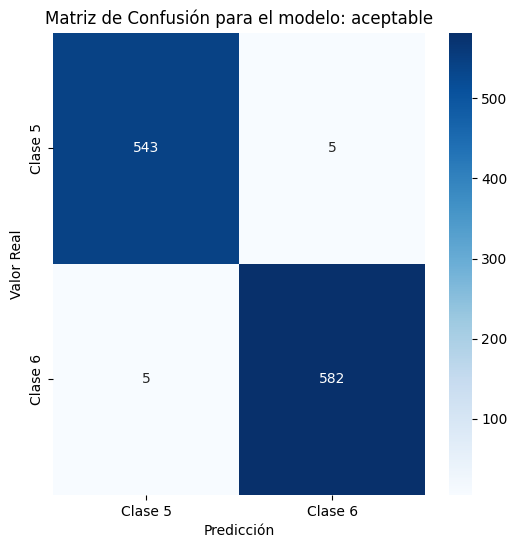

In [ ]:
# prompt: generar una matriz de confusi√≥n para cada modelo
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

for nombre, modelo in modelos.items():
    print(f"\nEvaluando el modelo: {nombre}")
    modelo.to(device)
    modelo.eval()

    all_preds = []
    all_labels = []

    with torch.no_grad():
        for X_test, y_test in test_loader:
            X_test, y_test = X_test.to(device), y_test.to(device).float().unsqueeze(-1)
            pred_test = modelo(X_test)
            predicted_classes = (pred_test > 0.5).float()

            all_preds.extend(predicted_classes.cpu().numpy())
            all_labels.extend(y_test.cpu().numpy())

    # Generate confusion matrix
    cm = confusion_matrix(all_labels, all_preds)

    # Plot confusion matrix
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Clase 5', 'Clase 6'], yticklabels=['Clase 5', 'Clase 6'])
    plt.title(f'Matriz de Confusi√≥n para el modelo: {nombre}')
    plt.xlabel('Predicci√≥n')
    plt.ylabel('Valor Real')
    plt.show()

Las tres matrices tuvieron un resultado muy similar, pero el modelo de subajuste tuvo un poco m√°s de errores que los dem√°s. De igual manera, considero que tienen un desempe√±o aceptable.

In [ ]:
# prompt: generar un reporte de casificaci√≥n para cada modelo
from sklearn.metrics import classification_report

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

for nombre, modelo in modelos.items():
    print(f"\nReporte de Clasificaci√≥n para el modelo: {nombre}")
    modelo.to(device)
    modelo.eval()

    all_preds = []
    all_labels = []

    with torch.no_grad():
        for X_test, y_test in test_loader:
            X_test, y_test = X_test.to(device), y_test.to(device).float().unsqueeze(-1)
            pred_test = modelo(X_test)
            predicted_classes = (pred_test > 0.5).float()

            all_preds.extend(predicted_classes.cpu().numpy())
            all_labels.extend(y_test.cpu().numpy())

    # Generate and print classification report
    report = classification_report(all_labels, all_preds, target_names=['Clase 5', 'Clase 6'])
    print(report)


Reporte de Clasificaci√≥n para el modelo: subajusta
              precision    recall  f1-score   support

     Clase 5       0.97      0.97      0.97       548
     Clase 6       0.98      0.97      0.98       587

    accuracy                           0.97      1135
   macro avg       0.97      0.97      0.97      1135
weighted avg       0.97      0.97      0.97      1135


Reporte de Clasificaci√≥n para el modelo: sobreajusta
              precision    recall  f1-score   support

     Clase 5       0.99      0.99      0.99       548
     Clase 6       0.99      0.99      0.99       587

    accuracy                           0.99      1135
   macro avg       0.99      0.99      0.99      1135
weighted avg       0.99      0.99      0.99      1135


Reporte de Clasificaci√≥n para el modelo: aceptable
              precision    recall  f1-score   support

     Clase 5       0.99      0.99      0.99       548
     Clase 6       0.99      0.99      0.99       587

    accuracy         

Por √∫ltimo, el reporte de clasificaci√≥n tiene muy buenos porcentajes para los tres modelos. Si me gu√≠ara solo por estas m√©tricas, solo descartar√≠a al modelo del subajuste y nada m√°s porque su porcentaje es apenas menor, pero todas las redes neuronales en este reporte brindaron un buen rendimiento.

## 3.4 ¬ø C√≥mo elije el "modelo aceptable" o modelo √≥ptimo?


Describa y programe el procedimiento para determinar un modelo √≥ptimo dado un rango de configuraciones ( por ejemplo dos capas ocultas e ir incrementando unidades ocultas desde un valor inicial a uno final).

En los pasos anteriores tuve que elejir intencionalmente los par√°metros de las redes neuronales para generar cierto resultado. Ahora lo que voy a hacer es realizar un gread search para encontrar la mejor configuraci√≥n de una red neuronal para este caso de clasificaci√≥n de clases:

In [ ]:
# C√≥digo que arm√© junto con Copilot

# Clase flexible para crear modelos con dos capas ocultas
class ModeloVariable(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2):
        super().__init__()
        self.red = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_size, hidden_size1),
            nn.ReLU(),
            nn.Linear(hidden_size1, hidden_size2),
            nn.ReLU(),
            nn.Linear(hidden_size2, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.red(x)

# Rango de unidades ocultas
rangos = [(8, 8), (16, 16), (32, 32), (64, 64), (128, 128)]
resultados = {}

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

for h1, h2 in rangos:
    print(f"\nEntrenando modelo con capas ocultas: {h1}, {h2}")
    modelo = ModeloVariable(784, h1, h2).to(device)
    optimizer = torch.optim.SGD(modelo.parameters(), lr=0.01)
    loss_fn = nn.BCELoss()

    # Entrenamiento
    num_epochs = 100
    for epoch in range(num_epochs):
        modelo.train()
        for X, y in train_loader:
            X, y = X.to(device), y.to(device).float().unsqueeze(1)
            optimizer.zero_grad()
            pred = modelo(X)
            loss = loss_fn(pred, y)
            loss.backward()
            optimizer.step()

    # Funci√≥n de evaluaci√≥n
    def evaluar(loader):
        modelo.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for X, y in loader:
                X, y = X.to(device), y.to(device).float().unsqueeze(1)
                pred = modelo(X)
                pred_bin = (pred > 0.5).float()
                correct += (pred_bin == y).sum().item()
                total += y.size(0)
        return correct / total

    acc_train = evaluar(train_loader)
    acc_valid = evaluar(valid_loader)
    acc_test = evaluar(test_loader)

    resultados[(h1, h2)] = {
        "train": acc_train,
        "valid": acc_valid,
        "test": acc_test
    }

    print(f"Accuracy - Train: {acc_train:.4f} | Valid: {acc_valid:.4f} | Test: {acc_test:.4f}")

# Mostrar mejor configuraci√≥n
mejor_config = max(resultados.items(), key=lambda x: x[1]["valid"])
(h1_best, h2_best), metricas = mejor_config

print("\nüîç Mejor configuraci√≥n encontrada:")
print(f"Capas ocultas: {h1_best}, {h2_best}")
print(f"Accuracy - Train: {metricas['train']:.4f} | Valid: {metricas['valid']:.4f} | Test: {metricas['test']:.4f}")




Entrenando modelo con capas ocultas: 8, 8
Accuracy - Train: 0.9987 | Valid: 0.9912 | Test: 0.9850

Entrenando modelo con capas ocultas: 16, 16
Accuracy - Train: 0.9982 | Valid: 0.9850 | Test: 0.9859

Entrenando modelo con capas ocultas: 32, 32
Accuracy - Train: 0.9986 | Valid: 0.9894 | Test: 0.9841

Entrenando modelo con capas ocultas: 64, 64
Accuracy - Train: 0.9997 | Valid: 0.9912 | Test: 0.9868

Entrenando modelo con capas ocultas: 128, 128
Accuracy - Train: 0.9998 | Valid: 0.9921 | Test: 0.9885

üîç Mejor configuraci√≥n encontrada:
Capas ocultas: 128, 128
Accuracy - Train: 0.9998 | Valid: 0.9921 | Test: 0.9885


Utilizando un gread search manual, tuve un modelo √≥ptimo con la configuraci√≥n de dos capas con 128 neuronas cada una, y una exactitud del 98%.
Tiene rendimiento apenas peor que el modelo aceptable que configur√© manualmente, por lo que elegir√≠a la Red aceptable que hice en el punto 2.1 antes que esta.

# Conclusiones

Durante este trabaj√≥ realic√© tres modelos de redes neuronales para buscar un caso de subajuste, sobreajuste y uno que sea aceptable. Configur√© cada modelo con el criterio que cre√≠a que era correcto para cada red.
Los resultados no fueron tan marcados como esperaba, los gr√°ficos y m√©tricas eran muy similares entre s√≠, y si no hubiera comparado cada modelo y lo hubiera probado por s√≠ solos considerar√≠a que tienen un buen rendimiento, salvo el de sobreajuste que se ve clara su diferencia en train test y la falta de generalizaci√≥n.
Esto me lleva a la importancia de ver todas las m√©tricas y gr√°ficos que sean necesarios, porque si me hubiera fijado solo en la matriz de confusi√≥n y el reporte de clasificaci√≥n, no ver√≠a el problema de sobreajuste.
Tambi√©n me di cuenta que seg√∫n el dataset con el que estemos trabajando la configuraci√≥n de par√°metros var√≠a much√≠simo.
Yo configur√© la red de subajuste con una cantidad min√≠ma de capas y neuronas, sin funciones de regulaci√≥n y activaci√≥n para que me de un mal desempe√±o, pero el resultado fue mucho m√°s alto del que yo esperaba.

En conclusi√≥n, pude aprender las bases para utilizar redes neuronales en Pytorch, aprend√≠ a leer los gr√°ficos de p√©rdida y √©pocas y tambi√©n conoc√≠ nuevos par√°metros que se usan en esta librer√≠a. Adem√°s pude ver las diferencias entre sckit-learn y Pytorch a la hora de armar el c√≥digo, y la gran diferencia que tiene la arquitectura de cada uno. Por √∫ltimo reforc√© los conceptos de sobreajuste y subajuste.

# Referencias

Utilic√© las siguientes dos p√°ginas para guiarme con el c√≥digo:
https://phuijse.github.io/MachineLearningBook/contents/neural_networks/torch-training.html
https://www.datacamp.com/es/tutorial/pytorch-tutorial-building-a-simple-neural-network-from-scratch

Tambi√©n me ayude mucho de copilot para preguntarle todo lo que no entend√≠a y que me ayudara a adaptar el c√≥digo de las p√°ginas a este trabajo.
Por √∫ltimo use las correciones de Gemini de colab cuando hubo alg√∫n error en el c√≥digo, y le ped√≠ que me arme los gr√°ficos (deje los prompt en cada celda que lo use).